<a href="https://colab.research.google.com/github/mcbaccam/Anal-tica-de-Negocio/blob/main/Proyecto_FINAL_Analitica_de_negocios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proyecto Final Analitica de Negocios

Maria Camila Bacca
Isabella Gomez Carmona
Alejandro Sanchez

Paso 0: Se cargan las librerias de trabajo

In [ ]:
import numpy as np #Funciones matemaricas
import pandas as pd #Comunicacion con excel #Add this line to import the pandas library
from sklearn.naive_bayes import GaussianNB #Funcion Gaussiana
from sklearn.metrics import confusion_matrix #La metrica de medida

import matplotlib.pyplot as plt #Graficador de cosas
from sklearn.tree import DecisionTreeClassifier


import matplotlib.pyplot as plt
import seaborn as sns

#Prestamo interbibliotecario
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

Paso 1. Se cargan las librerias de trabajo

In [ ]:
nxl='/content/sample_data/LUNG CANCER PREDICTION.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0) #Traigo los datos
XDB.dropna(inplace=True) #Eliminar datos faltantes, celdas vacias and update the DataFrame

#Seleccionamos las variables de interes
XDB=XDB[['Age','Gender','Air Pollution', 'Alcohol use','Genetic Risk', 'Obesity', 'Smoking', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Snoring', 'Level']]

#Convertir la columna 'gender' a numérica (0 y 1) usando LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
XDB['Level'] = label_encoder.fit_transform(XDB['Level'])

##0 ES HIGH CHANCE 1 ES LOW CHANCE

#Datos de entrada - np.array()- convertir a numeros
XD=np.array(XDB[['Age','Gender','Air Pollution', 'Alcohol use','Genetic Risk', 'Obesity', 'Smoking', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Snoring']])

XD = pd.get_dummies(XDB[['Age','Gender','Air Pollution', 'Alcohol use','Genetic Risk', 'Obesity', 'Smoking', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Snoring']])
XD = XD.to_numpy()

#Datos de salida - valor deseado - que quiero quue aprenda el modelo
yd=np.array(XDB['Level'])

print(XDB)

#Porcentaje de pacientes
len(XD)
len(np.where(yd==1)[0])

len(np.where(yd==1)[0])/len(XD)
print("El porcentaje de pacientes sin cancer de pulmon:", len(np.where(yd==1)[0])/len(XD))


#Porcentaje de pacientes SIN
len(XD)
len(np.where(yd==0)[0])

len(np.where(yd==0)[0])/len(XD)
print("El porcentaje de pacientes con cancer de pulmon", len(np.where(yd==0)[0])/len(XD))

     Age  Gender  Air Pollution  Alcohol use  Genetic Risk  Obesity  Smoking  \
0     35       1              4            5             5        7        2   
1     37       1              7            7             6        7        7   
2     46       1              6            8             7        7        8   
3     35       1              4            5             5        7        2   
4     44       1              6            7             7        7        7   
..   ...     ...            ...          ...           ...      ...      ...   
663   61       1              2            3             1        4        3   
664   55       1              3            1             2        1        3   
665   33       1              2            4             3        4        3   
666   45       1              3            1             2        3        1   
667   53       1              3            1             3        3        2   

     Chest Pain  Coughing of Blood  Fat

In [ ]:
total_data_points = len(XD)
print("El numero total de datos es: ", total_data_points)

El numero total de datos es:  668


**Caracterizacion de las variables aleatorias y correlacion**

<Figure size 1000x1000 with 0 Axes>

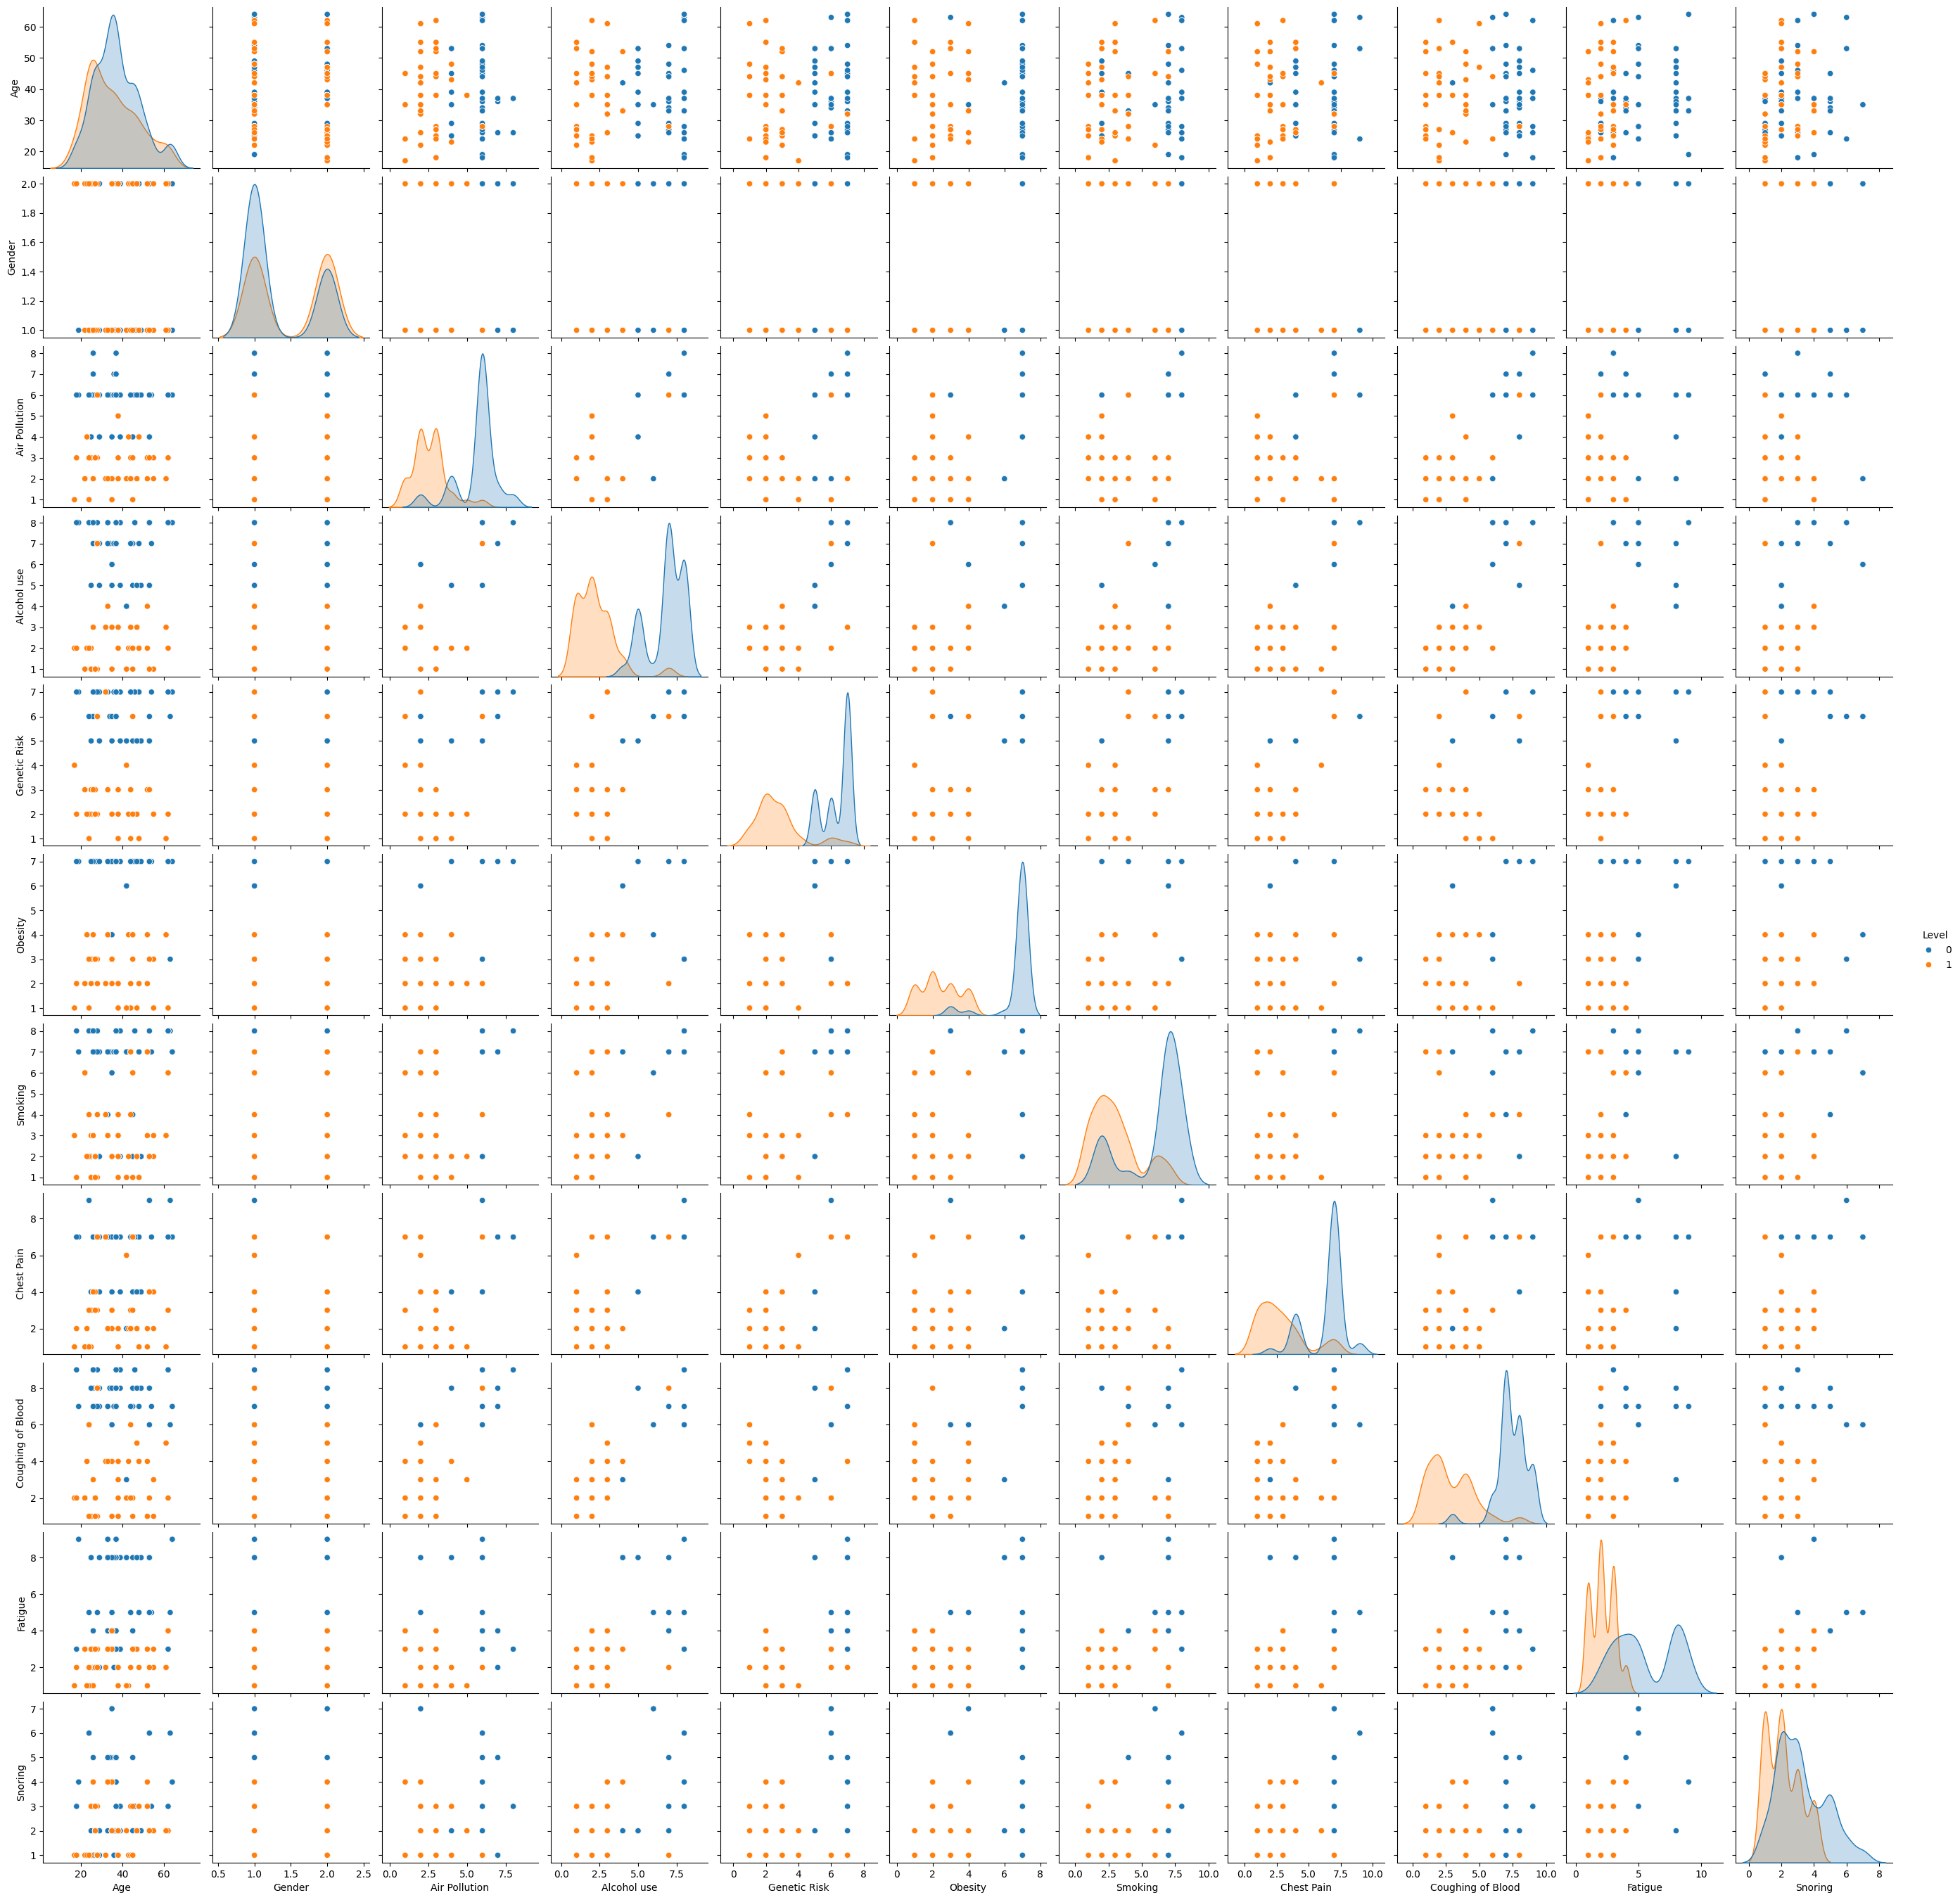

,Age,Gender,Air Pollution,Alcohol use,Genetic Risk,Obesity,Smoking,Chest Pain,Coughing of Blood,Fatigue,Snoring,Level
Age,1.000000,-0.361377,0.047570,0.070786,0.008534,0.034732,0.132204,0.018987,0.097382,0.154283,0.110919,-0.083292
Gender,-0.361377,1.000000,-0.223065,-0.304422,-0.239898,-0.157435,-0.276005,-0.282428,-0.211827,-0.196170,-0.310725,0.201908
Air Pollution,0.047570,-0.223065,1.000000,0.835623,0.742140,0.739986,0.596365,0.729137,0.792624,0.368729,0.291832,-0.788347
Alcohol use,0.070786,-0.304422,0.835623,1.000000,0.880105,0.796810,0.745238,0.816477,0.882947,0.500339,0.455824,-0.885192
Genetic Risk,0.008534,-0.239898,0.742140,0.880105,1.000000,0.788407,0.718311,0.881917,0.746587,0.477557,0.283862,-0.847058
Obesity,0.034732,-0.157435,0.739986,0.796810,0.788407,1.000000,0.485564,0.615839,0.799849,0.624676,0.253616,-0.900806
Smoking,0.132204,-0.276005,0.596365,0.745238,0.718311,0.485564,1.000000,0.675709,0.507752,0.199401,0.341456,-0.606245
Chest Pain,0.018987,-0.282428,0.729137,0.816477,0.881917,0.615839,0.675709,1.000000,0.684008,0.349230,0.429338,-0.731037
Coughing of Blood,0.097382,-0.211827,0.792624,0.882947,0.746587,0.799849,0.507752,0.684008,1.000000,0.516067,0.278797,-0.850361
Fatigue,0.154283,-0.196170,0.368729,0.500339,0.477557,0.624676,0.199401,0.349230,0.516067,1.000000,0.234059,-0.676657


from matplotlib import pyplot as plt
_df_24['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25['Gender'].plot(kind='hist', bins=20, title='Gender')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26['Air Pollution'].plot(kind='hist', bins=20, title='Air Pollution')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_27['Alcohol use'].plot(kind='hist', bins=20, title='Alcohol use')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_28.plot(kind='scatter', x='Age', y='Gender', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29.plot(kind='scatter', x='Gender', y='Air Pollution', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_30.plot(kind='scatter', x='Air Pollution', y='Alcohol use', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_31.plot(kind='scatter', x='Alcohol use', y='Genetic Risk', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_32['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_33['Gender'].plot(kind='line', figsize=(8, 4), title='Gender')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_34['Air Pollution'].plot(kind='line', figsize=(8, 4), title='Air Pollution')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_35['Alcohol use'].plot(kind='line', figsize=(8, 4), title='Alcohol use')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
XDB=pd.read_excel(nxl,sheet_name=0) #Traigo los datos
XDB=XDB.dropna()
XDB.head(5)

# Convert 'Gender' and 'Level' columns to numerical using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in ['Level']: # Loop through 'Gender' and 'Level' columns
    if XDB[col].dtype == 'object': # Only encode if the column is of type 'object' (string)
        XDB[col] = label_encoder.fit_transform(XDB[col])

XDB=XDB[['Age','Gender','Air Pollution', 'Alcohol use','Genetic Risk', 'Obesity', 'Smoking', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Snoring', 'Level']]

plt.figure(figsize=(10,10))
sns.pairplot(XDB, hue='Level')
plt.show()

XDB.corr()

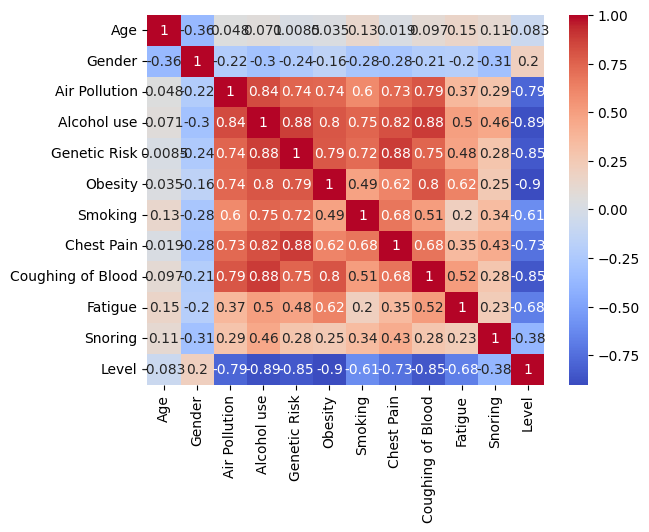

In [ ]:
#Gráfico de la matriz de correlación entre las variables
corr = XDB.corr() # Calculate and store the correlation matrix in the variable 'corr'
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

**Parte 1: Modelo Naive Bayes**

In [ ]:
mnb=GaussianNB() #Llamamos el modelo
mnb.fit(XD,yd)
ydp=mnb.predict(XD) #Muestra los datos de salida que el obtuvo

#Metrica de evaluacion - como se comporto el modelo identificando la preapr/preneg
cm=confusion_matrix(yd,ydp)
print("La matriz de confusion es: ")
print(cm)
print()

VN=cm[0,0] #Verdaderos Negativos
FP=cm[0,1] #Falsos Positivos
FN=cm[1,0] #Falsos Negativos
VP=cm[1,1] #Verdaderos Positivos

Exactitud=(VP+VN)/len(XD)
print("La exactitud del modelo es: ") #Comportamiento General
print(Exactitud)

Sensibilidad=VP/(VP+FN)
print("La sensibilidad del modelo es: ") #Como se comporto frente a los positivos
print(Sensibilidad)

Especificidad=VN/(VN+FP)
print("La especificidad del modelo es: ") #Como se comporoto frente a los negativos
print(Especificidad)

#Parametro de las medias de las variables para cada categoria
u=mnb.theta_ #Se estiman las medidas
sigma=np.sqrt(mnb.var_) #Se estiman las varianzas

#Las variaciones de las variables
LI=u-sigma
LS=u+sigma
print("La medida de las variables por categoria:")
print(u)
print()
print("El limite inferior de la variacion de las variables por categoria es:")
print(LI)
print()
print("El limite superior de la variacion de las variables por categora es:")
print(LS)
print()
print("La varianza de las variables por categoria es:")
print(sigma)
print()
print()

#Metrica de evaluación
cm=confusion_matrix(yd,ydp)

XD = XDB.drop('Level', axis=1)
yd = XDB['Level']


La matriz de confusion es: 
[[365   0]
 [ 10 293]]

La exactitud del modelo es: 
0.9850299401197605
La sensibilidad del modelo es: 
0.966996699669967
La especificidad del modelo es: 
1.0
La medida de las variables por categoria:
[[37.32054795  1.30958904  5.69315068  6.83013699  6.37534247  6.68219178
   6.0739726   6.39178082  7.43835616  5.5890411   3.22739726]
 [35.41254125  1.50825083  2.60066007  2.2310231   2.73267327  2.40924092
   3.02310231  2.8349835   2.86138614  2.17161716  2.14191419]]

El limite inferior de la variacion de las variables por categoria es:
[[26.61099569  0.8472647   4.42000021  5.67448555  5.55508836  5.67927235
   3.91774379  4.89203163  6.30618277  3.22124563  1.73575288]
 [23.30583303  1.00831878  1.49162143  0.97261452  1.30297117  1.35736194
   1.24791736  1.01490007  1.17649085  1.27594376  1.11601568]]

El limite superior de la variacion de las variables por categora es:
[[48.0301002   1.77191338  6.96630116  7.98578843  7.19559657  7.68511121
   8.2

**Parte 2. Arbol de decision**

In [ ]:
mar=DecisionTreeClassifier(criterion='gini', max_depth = 11) #Niveles o variables de entrada
mar.fit(XD,yd)
ydp=mar.predict(XD)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(yd,ydp)
print(cm)
print()

#Evaluamos el modelo
VN=cm[0][0]; FP=cm[0][1]; FN=cm[1][0]; VP=cm[1][1]

Ex=(VN+VP)/(VN+VP+FN+FP) #Que porcentaje de los datos pronostico correctamente
print("La exactitud alcanzada por el modelo es:",Ex)
Se=VP/(FN+VP) #Como le fue con los positivos
print("La sensibilidad alcanzada por el modelo fue:",Se)
Es=VN/(VN+FP) #Como le fue con los negativos
print("La especificidad alcanzada por el modelo fue:",Es)

[[365   0]
 [  0 303]]

La exactitud alcanzada por el modelo es: 1.0
La sensibilidad alcanzada por el modelo fue: 1.0
La especificidad alcanzada por el modelo fue: 1.0


In [ ]:
#Las librerias para graficar árbol
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

VS = ['Age','Gender','Air Pollution', 'Alcohol use','Genetic Risk', 'Obesity', 'Smoking', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Snoring']
dot_graph=export_graphviz(mar,feature_names=VS)
graph=graph_from_dot_data(dot_graph)
graph.write_png('arbol.png')

True


**Parte 3: Modelo de Agrupamiento K MEANS**

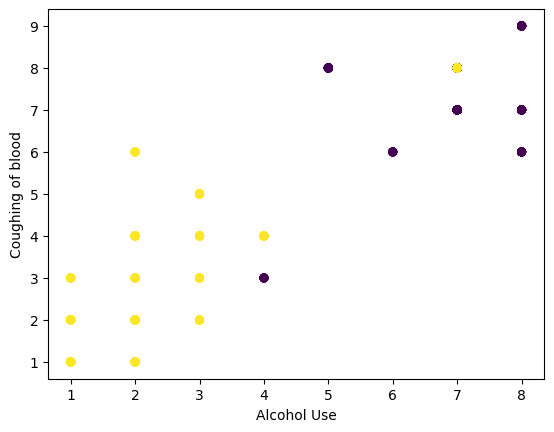

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

mknn = KNeighborsClassifier(n_neighbors=668)  # Tomar 10 vecinos
mknn.fit(XD, yd)  # Se ajusta el modelo

# Evaluamos el funcionamiento del modelo
ydp = mknn.predict(XD)

# Calculate XDP based on prediction (assuming XDP should hold features based on ydp)
XDP = XD[ydp == 1]  # Example: Selecting features where prediction is 1

# Las graficas se hacen con las variables que tienen mas correlacion
# Assuming 'Alcohol use' and 'Coughing of blood' are column names in XD
plt.scatter(XD.iloc[:, XD.columns.get_loc('Alcohol use')],
            XD.iloc[:, XD.columns.get_loc('Coughing of Blood')],
            c=yd, s=30, cmap='viridis')
plt.xlabel('Alcohol Use')
plt.ylabel('Coughing of blood')
plt.show()

Donde quedo el primer solicitante 1
Donde quedo el segundo solicitante 1
Donde quedo el tercer solicitante 1



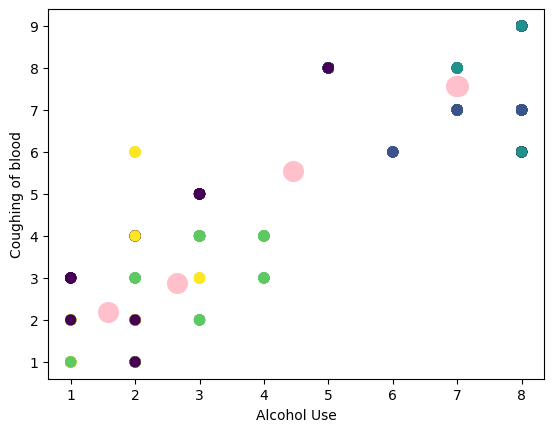

Total de personas del cluster 1: 182
Pacientes sin cancer para el Cluster 1 es: 1.0
Pacientes con cancer para el Cluster 1 es: 0.0

Total de pacientes con cancer en el cluster 1: 0

Total de personas del cluster 2: 114
Pacientes sin cancer para el Cluster 2 es: 0.9122807017543859
Pacientes con cancer para el Cluster 2 es: 0.08771929824561403

Total de pacientes con cancer en el cluster 2: 10

Total de personas del cluster 3: 122
Pacientes sin cancer para el Cluster 3 es: 0.08196721311475409
Pacientes con cancer para el Cluster 3 es: 0.9180327868852459

Total de pacientes con cancer en el cluster 3: 112

Total de personas del cluster 4: 118
Pacientes sin cancerpara el Cluster 4 es: 0.0
Pacientes con cancer para el Cluster 4 es: 1.0

Total de pacientes con cancer en el cluster 4: 118



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

np.random.seed(42)  # Para que a todos nos de el mismo modelo

mkm = KMeans(n_clusters=5, init='random', random_state=42)
mkm.fit(XD)  # yd removed to avoid ValueError
labels = mkm.labels_  # Donde quedaron clasificados cada uno de los solicitantes
print("Donde quedo el primer solicitante", labels[0])
print("Donde quedo el segundo solicitante", labels[1])
print("Donde quedo el tercer solicitante", labels[2])
print()

# Access columns by name instead of numerical index
plt.scatter(XD['Alcohol use'], XD['Coughing of Blood'], c=labels, s=50, cmap='viridis')

# Calculate cluster centers
clusters = mkm.cluster_centers_
# Plot cluster centers
# Access cluster centers using column index (since it's a NumPy array)
plt.scatter(clusters[:, XD.columns.get_loc('Alcohol use')],
            clusters[:, XD.columns.get_loc('Coughing of Blood')],
            marker='o', s=200, facecolors='pink')

plt.xlabel('Alcohol Use')
plt.ylabel('Coughing of blood')
plt.show()

#Total de personas a graduarse en el cluster 1
c01 = len(np.where((labels==1) & (yd==1))[0])

#Cual es el porcentaje de pacientes con cancer y pacientes sin cancer del cluster 1
c10 = len(np.where((labels==1) & (yd==0))[0])
c11 = len(np.where((labels==1) & (yd==1))[0])
c10+c11
print('Total de personas del cluster 1:', c10+c11)
print("Pacientes sin cancer para el Cluster 1 es:", c10/(c10+c11))
print("Pacientes con cancer para el Cluster 1 es:", c11/(c10+c11))
print()

#Total de personas con cancer en el cluster 1
c11 = len(np.where((labels==1) & (yd==1))[0])

print('Total de pacientes con cancer en el cluster 1:', c11)
print()


#Cual es el porcentaje de pacientes con cancer y pacientes sin cancer del cluster 2
c20 = len(np.where((labels==2) & (yd==0))[0])
c21 = len(np.where((labels==2) & (yd==1))[0]) # Calculate c21 before using it
c20+c21
print('Total de personas del cluster 2:', c20+c21)
print("Pacientes sin cancer para el Cluster 2 es:", c20/(c20+c21))
print("Pacientes con cancer para el Cluster 2 es:", c21/(c20+c21))
print()

#Total de personas con cancer en el cluster 2
c21 = len(np.where((labels==2) & (yd==1))[0])

print('Total de pacientes con cancer en el cluster 2:', c21)
print()

#Cual es el porcentaje de pacientes con cancer y pacientes sin cancer  del cluster 3
c30 = len(np.where((labels==3) & (yd==0))[0])
c31 = len(np.where((labels==3) & (yd==1))[0])
c30+c31
print('Total de personas del cluster 3:', c30+c31)
print("Pacientes sin cancer para el Cluster 3 es:", c30/(c30+c31))
print("Pacientes con cancer para el Cluster 3 es:", c31/(c30+c31))
print()

#Total de personas a graduarse en el cluster 3
c31 = len(np.where((labels==3) & (yd==1))[0])

print('Total de pacientes con cancer en el cluster 3:', c31)
print()

#Cual es el porcentaje de pacientes con cancer y pacientes sin cancer  del cluster 4
c40 = len(np.where((labels==4) & (yd==0))[0])
c41 = len(np.where((labels==4) & (yd==1))[0])
c40+c41
print('Total de personas del cluster 4:', c40+c41)
print("Pacientes sin cancerpara el Cluster 4 es:", c40/(c40+c41))
print("Pacientes con cancer para el Cluster 4 es:", c41/(c40+c41))
print()

#Total de personas a graduarse en el cluster 4
c41 = len(np.where((labels==4) & (yd==1))[0])

print('Total de pacientes con cancer en el cluster 4:', c41)
print()

In [ ]:
mknn=KNeighborsClassifier(n_neighbors=668)   #Tomar 10 vecinos
mknn.fit(XD,yd)                             #Se ajusta el modelo

#Evaluamos el funcionamiento del modelo
ydp=mknn.predict(XD)

#Matriz de Confusion
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(yd,ydp)
print("Esta es la matriz de confusion:\n",cm)
print()

VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]

Exac=(VP+VN)/(VP+VN+FP+FN)
Sen=VP/(VP+FN)
Spec=VN/(VN+FP)
print("Exactitud:",Exac)
print("Sensibilidad:",Sen)
print("Especificidad:",Spec)

Esta es la matriz de confusion:
 [[365   0]
 [303   0]]

Exactitud: 0.5464071856287425
Sensibilidad: 0.0
Especificidad: 1.0


**Análisis**

**Parte 1: Categorización de las variables aleatorias y correlación**

Hay una  fuerte correlación positiva (0.88) entre el consumo de alcohol y el riesgo genetico de tener cancer de pulmón, lo que indica que el consumo excesivo puede aumentar significativamente el riesgo.

Encontramos una correlación fuerte entre el riesgo genético y el cancer (0.85) sugirirnedo que quienes tienen un riesgo genetico elevado, tienen mas posibilidades de desarrollar el cancer.

También tenemos una correlacion alta con la contaminacion del aire y el nivel de cancer (0.79), mostrando que en ambientes contaminados, puede aumentar la probabilidad de cancer.

La tos con sangre tiene una muy alta correlación con el cancer de pulon (0.85), indicando que una perosna que tenga tos con sangre, puede indicar una progresión de la enfermedad.

Smoking y Chest Pain también muestran una relación significativa, aunque de menor intensidad, lo cual indica que, si bien importantes, no son tan fuertes como los anteriores en su relación con el nivel de cáncer en este análisis.    


La exactitud del modelo es del 98.5%, mostrando que indica correctamente el 98.5% de los casos. Es un rendimiento muy alto.
La sensibilidad es del 96% , lo que significa que el modelo detecta correctamente el 96% de los casos positivos. Lo que indica que tiene un muy bajo índice de falsos negativos.
La especificidad es del 100% indicando que el modelo tiene una capacidad perfecta para identificar correctamente los negativos verdaderos.

**Parte 2: Arbol de decision:**

Identificamos 4 nodos puros:
- Nodo 1: Value [355,0] Alcohol Use> 4.5 -- Obesity>2.5
- Nodo 2: Value [0,10] Alcohol Use> 4.5 -- Obesity <=2.5
- Nodo 3: Value [10,0] Alcohol Use<= 4.5 -- Obesity> 5.0
- Nodo 4: Value [0,293] Alcohol Use<= 4.5 -- Obesity<= 5.0

Encontramos una exactitud, sensibilidad y especificidad de 1, lo que indica que el modelo es perfecto en su rendimiento, clasificando todas las muestras correctamente sin errores de ningún tipo (ni falsos positivos ni falsos negativos).

**Parte 3: Modelo KNN:**
Encontramos una exactitud, sensibilidad y especificidad de 1, lo que indica que el modelo es perfecto en su rendimiento, clasificando todas las muestras correctamente sin errores de ningún tipo (ni falsos positivos ni falsos negativos).